<a href="https://colab.research.google.com/github/derrickkhuynh/Misc.-Projects/blob/master/RADAR/Polar_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Functions

In [0]:
def filterdata(distance):
  for x in range(0,len(distance)):
      if(distance[x] >= 40):
        distance[x] = 10000
  for x in range(0,len(distance)):
    if(((distance[x-1]/distance[x]) >= 5.) and 
       (x != (len(distance) - 1) and ((distance[x+1]/distance[x]) >= 5.))):
          distance[x] = distance[x-1]
  for x in range(0,len(distance)):
    if(distance[x] == 10000):
      distance[x] = 50
  return distance

In [0]:
def findLargeChange(theta, distance, angles, averageradius):
  i = 1
  for x in range(0, len(distance)):
    if(abs(distance[x-1] - distance[x]) >= 25):
      angles.append(theta[x])
      averageradius += distance[x]
      i+=1
  averageradius /= i
  return averageradius

In [0]:
def findlength(theta, distance, angles, averageradius):
  angles = []
  delangles = []
  averagerad = 0
  averagerad = findLargeChange(theta, distance, angles, averagerad)
  print("The average radius is " + str(averagerad) + " cm")
  for x in range(0, (int) (len(angles)/2)):
    delangles.append(angles[x+1] - angles[x])
    print(angles[x+1] - angles[x])
  for x in range(0, len(delangles)):
    return (delangles[x]*averagerad)

# Calibration

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/sonar readings.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

filterdata(distance1)
filterdata(distance2)

print(distance1)
print(distance2)

[24. 24. 24. 24. 24. 24. 24. 26. 23. 23. 22. 21. 21. 21. 21. 20. 20. 21.
 20. 20. 20. 20. 21. 20. 20. 20. 20. 21. 20. 21. 20. 21. 21. 21. 21. 21.
 21. 22. 21. 21. 21. 21. 22. 22. 22. 23. 23. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 22. 18. 20. 20. 19. 19.
 18. 18. 18. 18. 18. 17.]
[17. 17. 18. 18. 17. 17. 17. 17. 18. 19. 18. 18. 18. 19. 18. 19. 19. 20.
 21. 18. 23. 25. 25. 26. 50. 27. 27. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 

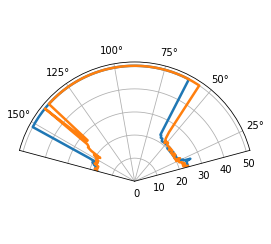

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/sonar readings.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

distance3 = filterdata(distance1)
distance4 =filterdata(distance2)

print(distance3)
print(distance4)

[24. 24. 24. 24. 24. 24. 24. 26. 23. 23. 22. 21. 21. 21. 21. 20. 20. 21.
 20. 20. 20. 20. 21. 20. 20. 20. 20. 21. 20. 21. 20. 21. 21. 21. 21. 21.
 21. 22. 21. 21. 21. 21. 22. 22. 22. 23. 23. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 22. 18. 20. 20. 19. 19.
 18. 18. 18. 18. 18. 17.]
[17. 17. 18. 18. 17. 17. 17. 17. 18. 19. 18. 18. 18. 19. 18. 19. 19. 20.
 21. 18. 23. 25. 25. 26. 50. 27. 27. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 

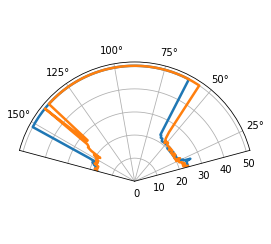

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
#ax1.set_ylim(0,100)
#ax1.set_yticks(np.arange(0,100,5))
ax1.plot(theta1,distance3,lw=2.5)
ax1.plot(theta2,distance4,lw=2.5)

# Plots

## 1 Object

In [0]:
def filterdata(distance):
  for x in range(0,len(distance)):
      if(distance[x] >= 45):
        distance[x] = 10000
  for x in range(0,len(distance)):
    if(((distance[x-1]/distance[x]) >= 5.) and (x != (len(distance) - 1) and ((distance[x+1]/distance[x]) >= 5.))):
          distance[x] = distance[x-1]
  for x in range(0,len(distance)):
    if(distance[x] == 10000):
      distance[x] = 50
  return distance

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/Data/sonar readings 1 object.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

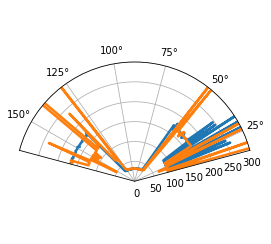

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.set_ylim(0,300)
#ax1.set_yticks(np.arange(0,50,5))
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

{}
{}
0.0
0


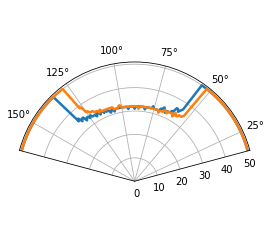

In [0]:
filterdata(distance1)
filterdata(distance2)

fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

angles1 = {}
angles2 = {}
avgrad1 = 0
avgrad2 = 0

avgrad1 = findLargeChange(theta1, distance1, angles1, avgrad1)
avgrad2 - findLargeChange(theta2, distance2, angles2, avgrad2)

print(angles1)
print(angles2)

print(avgrad1)
print(avgrad2)
#print(distance1)
#print(distance2)

## 2 Objects

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/Data/sonar readings 2 objects.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

filterdata(distance1)
filterdata(distance2)

print(distance1)
print(distance2)

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 21. 20. 19. 19. 18. 19. 19. 19.
 18. 18. 18. 19. 18. 18. 18. 18. 17. 18. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 18. 17. 17. 17. 17. 17. 18. 18. 18. 18. 17. 18. 18. 18. 18. 18.
 18. 18. 18. 18. 18. 19. 18. 19. 19. 19. 20. 19. 20. 20. 21. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 32. 29.
 30. 30. 30. 30. 29. 29. 29. 28. 29. 30. 29. 29. 28. 29. 29. 27. 29. 30.
 28. 28. 28. 28. 29. 28. 29. 28. 29. 29. 28. 29. 29. 29. 29. 29. 29. 29.
 28. 29. 29. 29. 30. 29. 30. 31. 29. 31. 30. 32. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50.]
[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 32. 31. 30. 30. 30. 30. 30. 28. 29. 29. 28. 29. 29. 29. 29.
 27. 29. 29. 29. 29. 29. 29. 29. 28. 29. 29. 28. 29. 29. 28. 29. 29. 29.
 29. 29. 29. 30. 29. 29. 29. 29. 30. 29. 29. 31. 30. 30. 31. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 20. 21. 20.
 20. 20. 19. 19. 19. 18. 

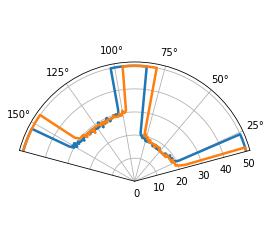

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

## 3 Objects

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/Data/sonar readings 3 objects.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

filterdata(distance1)
filterdata(distance2)

print(distance1)
print(distance2)

[23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23. 22. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 22. 20. 21. 21. 21. 21. 21. 22. 23. 23. 23. 21. 22. 22. 22.
 23. 21. 50. 50. 50. 50. 50. 50. 50. 25. 24. 23. 23. 21. 24. 24. 23. 23.
 22. 23. 23. 23. 22. 22. 22. 22. 22. 22. 21. 22. 22. 22. 22. 21. 21. 22.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 20. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 22. 21. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 23. 22. 23. 23. 23. 24. 23. 25. 23. 25. 34. 25. 35.
 35. 26. 35. 34. 30. 35. 34. 35. 35. 35. 35. 35. 34. 35. 35. 32. 35. 35.
 34. 36. 34. 35. 36. 34.]
[35. 35. 23. 36. 36. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 36. 35. 35. 36. 35. 36. 35. 34. 35. 35. 34. 34. 34. 34. 34. 35.
 26. 25. 25. 24. 24. 24. 23. 23. 23. 23. 23. 22. 22. 23. 22. 22. 22. 21.
 22. 22. 22. 22. 21. 22. 22. 21. 22. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 22. 21. 21. 21. 21. 22. 22.
 22. 22. 22. 22. 21. 22. 

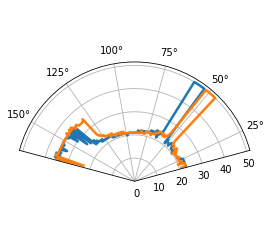

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

# Object Widths

## 9cm Wide Object

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/Data/sonar readings 9cm wide.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

filterdata(distance1)
filterdata(distance2)

angles9cm = 0
averagerad9cm = 0

print("1st pass: " + str(findlength(theta1, distance1, angles9cm, averagerad9cm)) + " cm")
print("2nd pass: " + str(-1*findlength(theta2, distance2, angles9cm, averagerad9cm)) + " cm")
print("Average width: " + str((findlength(theta1, distance1, angles9cm, averagerad9cm) - findlength(theta2, distance2, angles9cm, averagerad9cm) )/2) + " cm")

The average radius is 24.0 cm
1.0995574287564276
1st pass: 26.389378290154262 cm
The average radius is 23.333333333333332 cm
-1.0297442586766543
2nd pass: 24.0273660357886 cm
The average radius is 24.0 cm
1.0995574287564276
The average radius is 23.333333333333332 cm
-1.0297442586766543
Average width: 25.20837216297143 cm


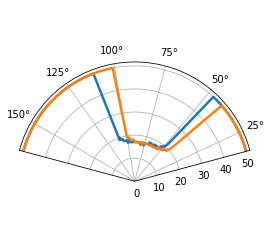

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

## 12 cm Wide Object

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/Data/sonar readings 12cm wide.csv', delimiter = ',')
theta1 = read_in_array[0:
                       (int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

filterdata(distance1)
filterdata(distance2)

angles12cm = 0
averagerad12cm = 0

print("1st pass: " + str(findlength(theta1, distance1, angles12cm, averagerad12cm)) + " cm")
print("2nd pass: " + str(-1*findlength(theta2, distance2, angles12cm, averagerad12cm)) + " cm")
print("Average width: " + str((findlength(theta1, distance1, angles12cm, averagerad12cm) - findlength(theta2, distance2, angles12cm, averagerad12cm) )/2) + " cm")

The average radius is 24.333333333333332 cm
1.117010721276371
1st pass: 27.180594217725023 cm
The average radius is 24.0 cm
-1.0471975511965979
2nd pass: 25.13274122871835 cm
The average radius is 24.333333333333332 cm
1.117010721276371
The average radius is 24.0 cm
-1.0471975511965979
Average width: 26.156667723221688 cm


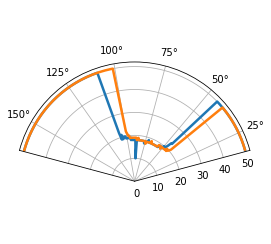

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)

## 20 cm Wide Object

In [0]:
read_in_array = np.loadtxt('/content/drive/My Drive/Physics 4BL Lab 6/Huang, Teresa/Final Project/Data/sonar readings 20cm wide.csv', delimiter = ',')
theta1 = read_in_array[0:(int)(len(read_in_array)/2),0]
theta1 *= np.pi / 180.
distance1 = read_in_array[0:(int)(len(read_in_array)/2),1]

theta2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),0]
theta2 *= np.pi / 180.
distance2 = read_in_array[(int)(len(read_in_array)/2):(int)(len(read_in_array)),1]

filterdata(distance1)
filterdata(distance2)

angles20cm = 0
averagerad20cm = 0

print("1st pass: " + str(findlength(theta1, distance1, angles20cm, averagerad20cm)) + " cm")
print("2nd pass: " + str(-1*findlength(theta2, distance2, angles20cm, averagerad20cm)) + " cm")
#print("Average width: " + str((findlength(theta1, distance1, angles20cm, averagerad20cm) - findlength(theta2, distance2, angles20cm, averagerad20cm) )/2) + " cm")

The average radius is 23.333333333333332 cm
1.0821041362364845
1st pass: 25.249096512184636 cm
The average radius is 25.0 cm
-1.1170107212763711
2nd pass: 27.92526803190928 cm


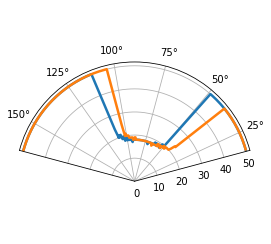

In [0]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_xlim(15*np.pi/180., 165*np.pi/180.)
ax1.plot(theta1,distance1,lw=2.5)
ax1.plot(theta2,distance2,lw=2.5)